A [Manhattan plot](https://en.wikipedia.org/wiki/Manhattan_plot#:~:text=A%20Manhattan%20plot%20is%20a,GWAS) is a variation of a [scatterplot](https://python-graph-gallery.com/scatter-plot/). It is used in genome-wide association studies (GWAS). Each point represents a genetic variant. Its X axis value represents its position on the chromosome and the value on the y-axis represents the `−log10` of its P value.

[Elad Joseph](https://stackoverflow.com/users/2807860/elad-joseph) suggested this nice solution on [stackoverflow](https://stackoverflow.com/questions/37463184/how-to-create-a-manhattan-plot-with-matplotlib-in-python) to build a manhattan plot with matplotlib and pandas:

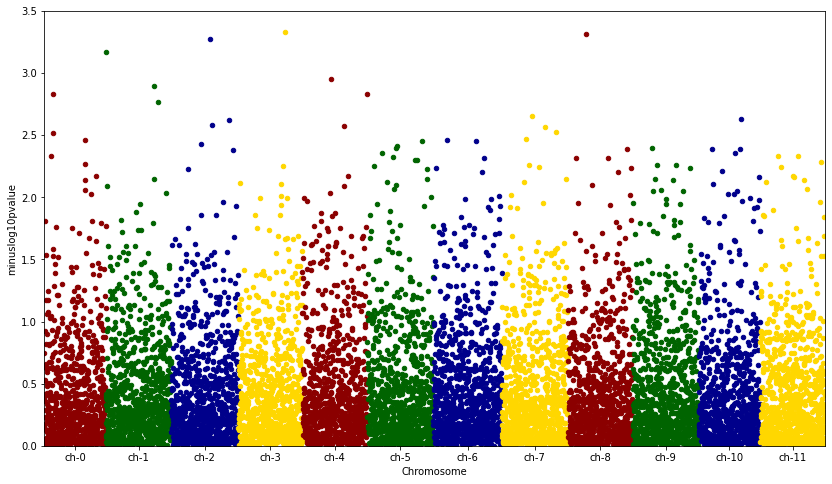

In [9]:
# import libraries
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

# sample data
df = DataFrame({'gene' : ['gene-%i' % i for i in np.arange(10000)],
'pvalue' : uniform.rvs(size=10000),
'chromosome' : ['ch-%i' % i for i in randint.rvs(0,12,size=10000)]})

# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(df.pvalue)
df.chromosome = df.chromosome.astype('category')
df.chromosome = df.chromosome.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values('chromosome')

# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('chromosome'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])

# x axis label
ax.set_xlabel('Chromosome')

# show the graph
plt.show()

Et voila! A nice Manhattan plot allowing to check for phenotype - genotype associations!

> Note: if you're willing to build a manhattan plot with R, [this blogpost](https://www.r-graph-gallery.com/101_Manhattan_plot.html) should interest you